In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append('../common')
from commonfunctions import visualize_elbow_chart, visualize_cluster_data

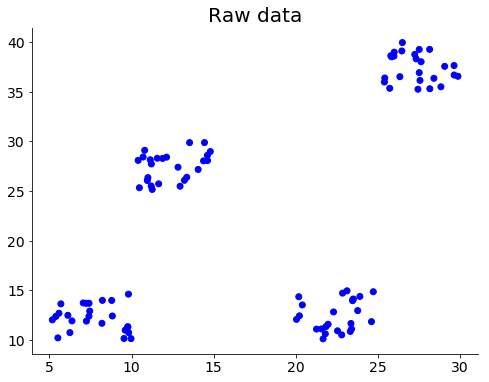

In [3]:
# Random state to get same output every time
random_state = 42

# Read the dataset and visulaize the data
dataset = pd.read_csv('../Data/cluster1.csv')
X = dataset.iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')

Perform k-means with 4 clusters and visualize the data

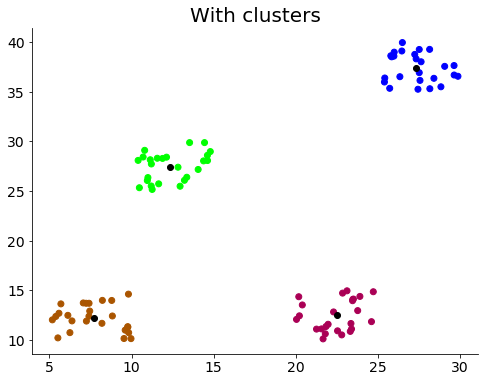

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = random_state)
kmeans.fit(X)

visualize_cluster_data(plt, X, kmeans.labels_, 'With clusters', kmeans.cluster_centers_, filename = 'file1_4clusters')

## Impact of number of clusters
Check clustering output with number of clusters = 3 and 5 as inputs

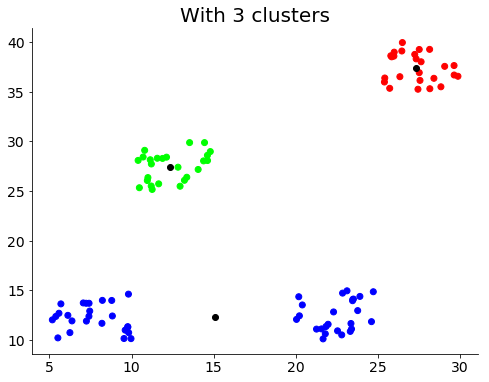

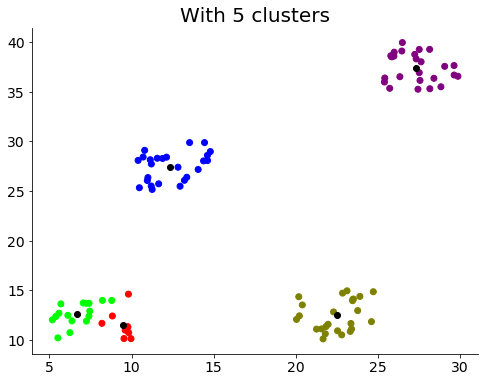

In [5]:
# Check for clustering with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = random_state)
kmeans.fit(X)
visualize_cluster_data(plt, X, kmeans.labels_, 'With 3 clusters', kmeans.cluster_centers_, filename = 'file1_3clusters')

# Check for clustering with 5 clusters
kmeans = KMeans(n_clusters = 5, random_state = random_state)
kmeans.fit(X)
visualize_cluster_data(plt, X, kmeans.labels_, 'With 5 clusters', kmeans.cluster_centers_, filename = 'file1_5clusters')

## Elbow chart
Number of clusters is a very important input. We plot the elbow cart to check the output of clustering against different number of clusters

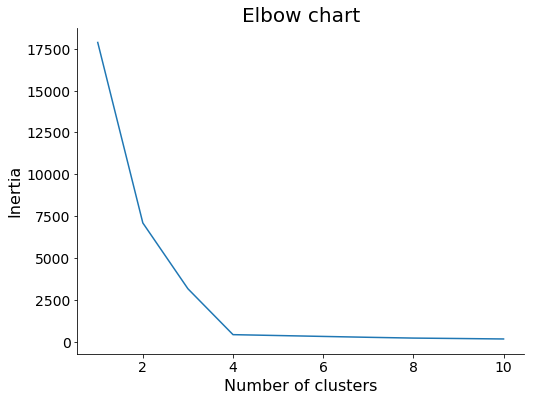

In [6]:
# Visualize the elbow chart
visualize_elbow_chart(plt, X, range(1,11), filename="file1_elbow_chart", random_state = random_state)

Run k-means on all the datasets with different value of clusters as inputs. Observe the elbow chart as well as clustering output. 

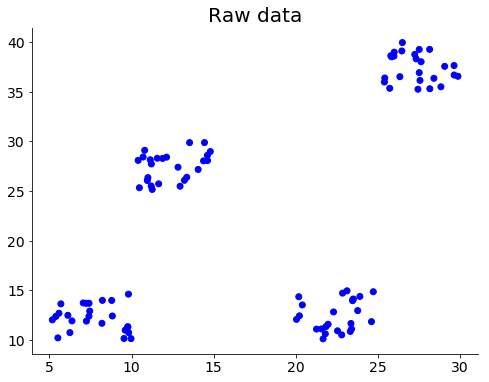

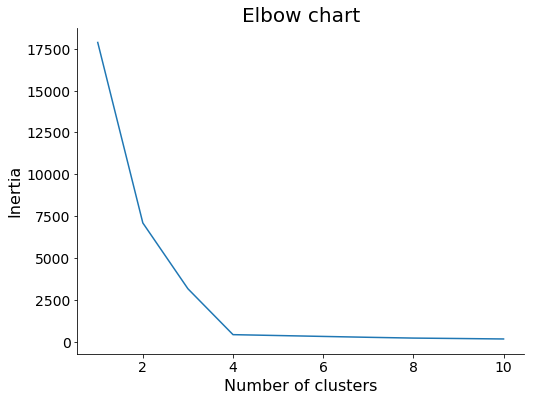

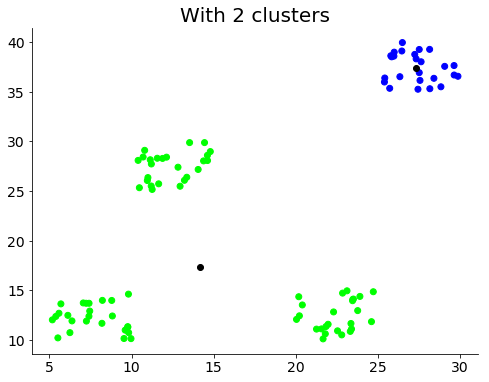

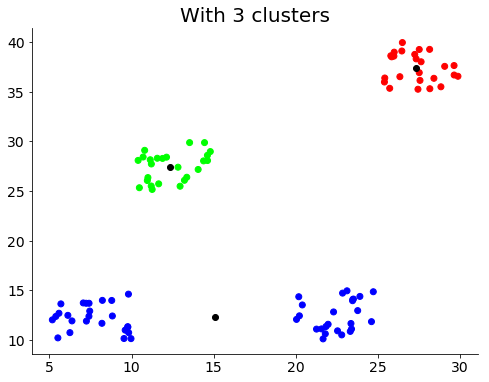

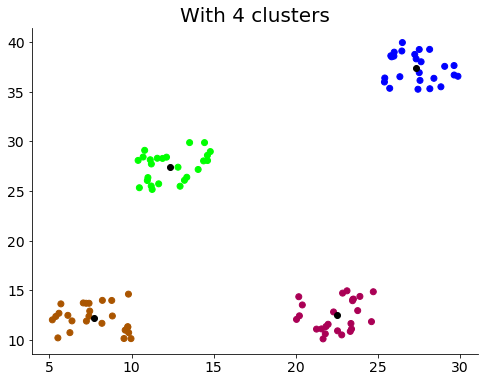

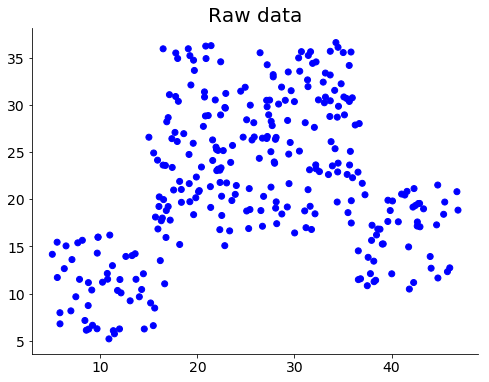

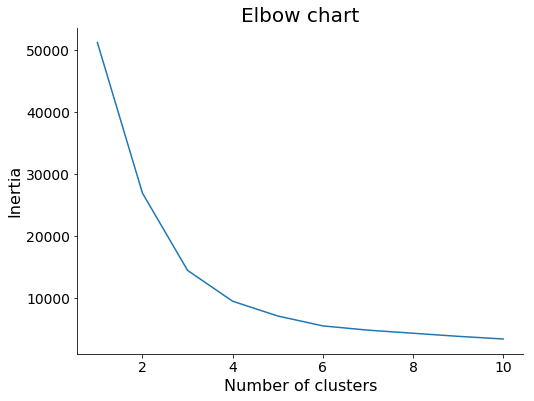

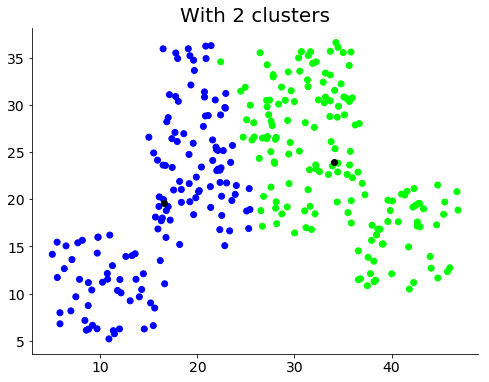

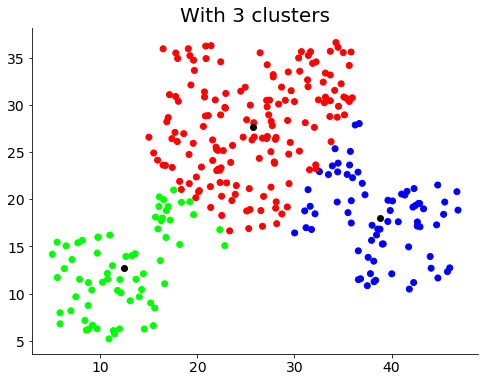

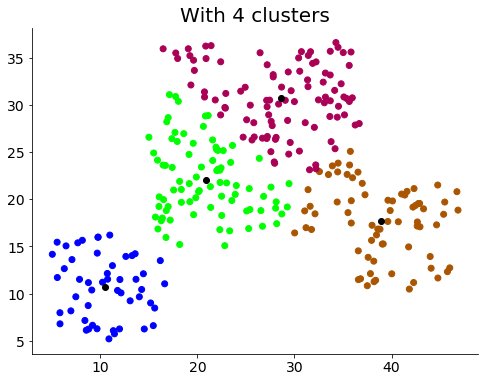

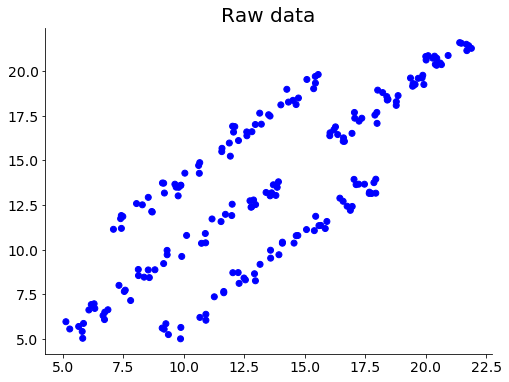

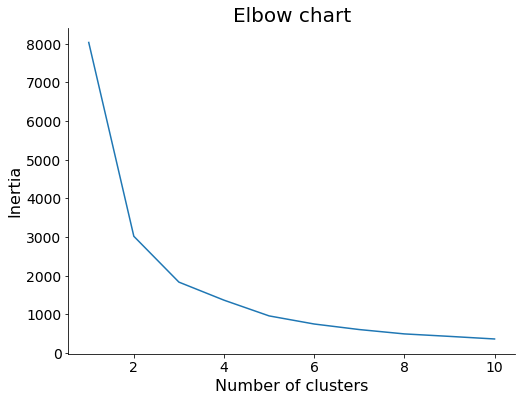

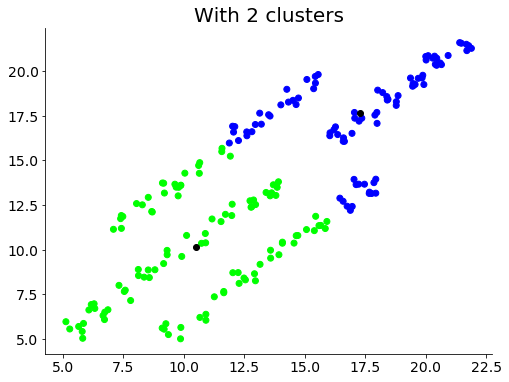

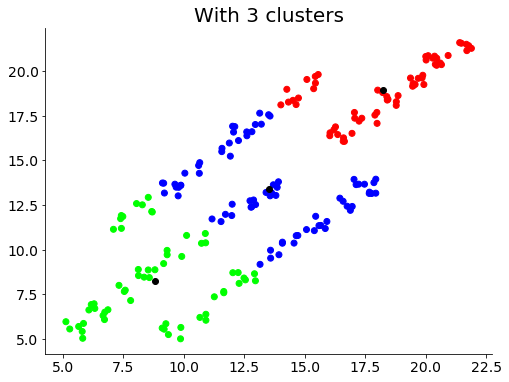

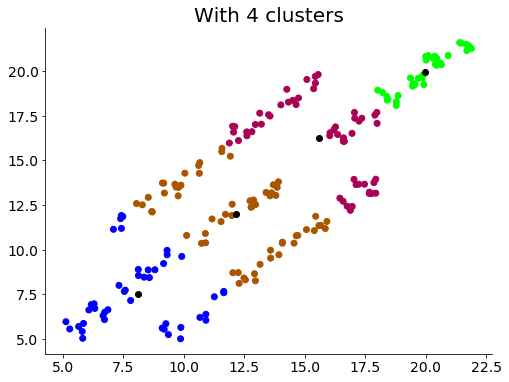

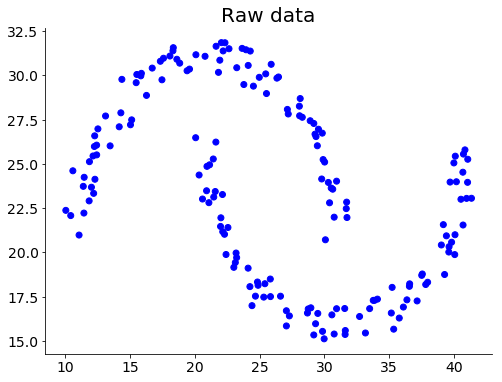

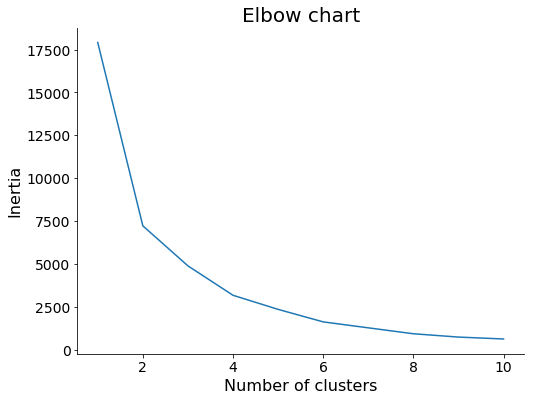

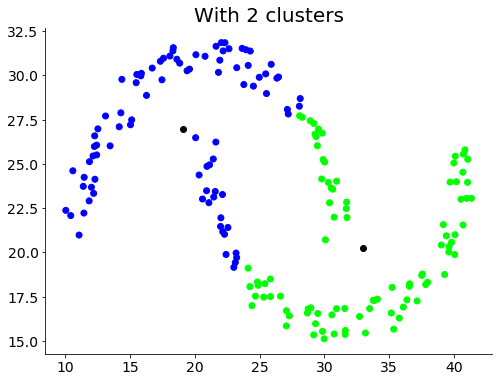

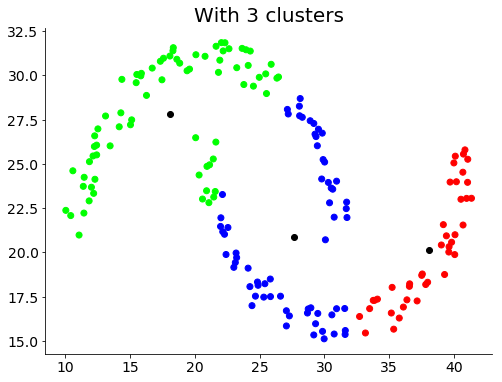

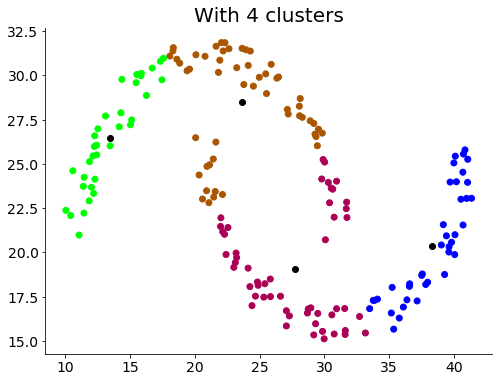

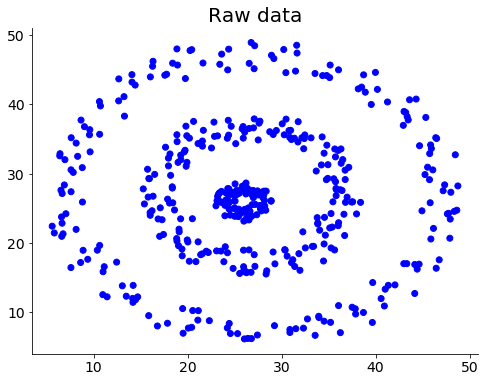

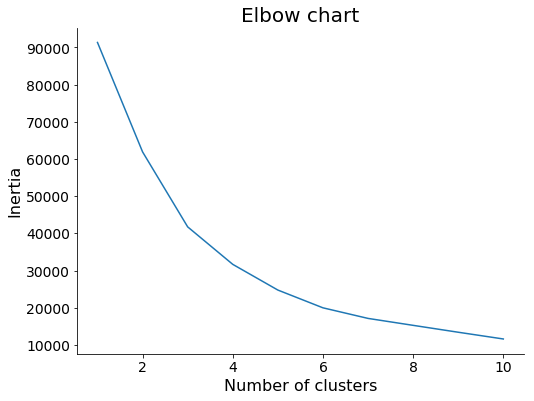

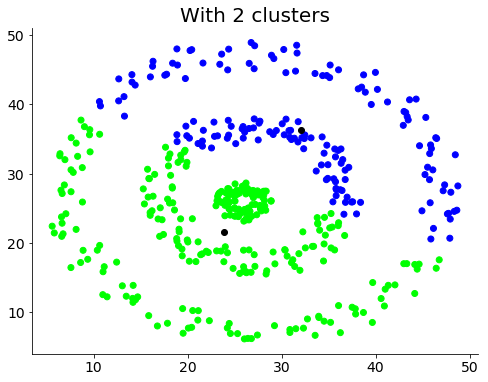

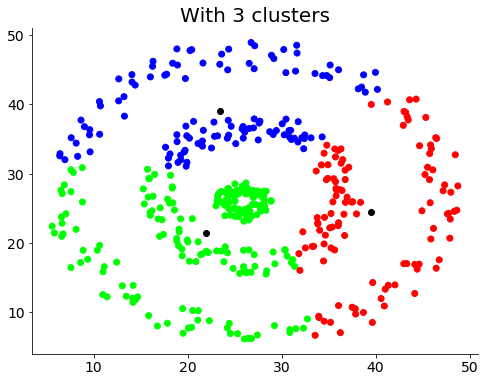

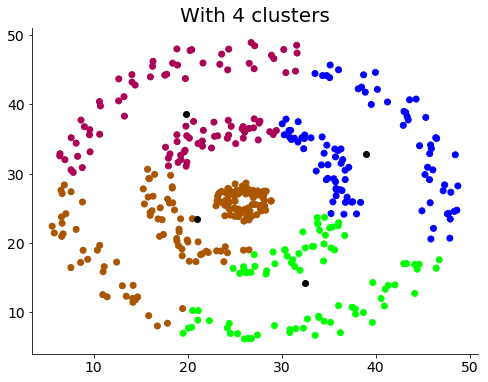

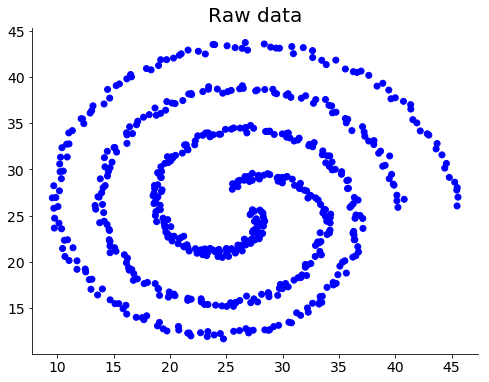

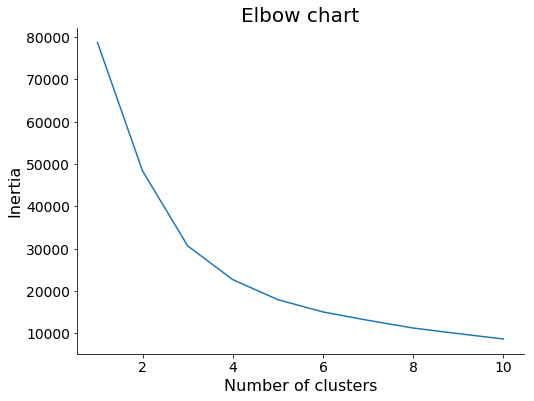

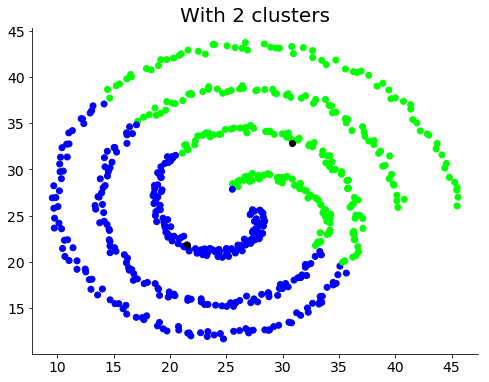

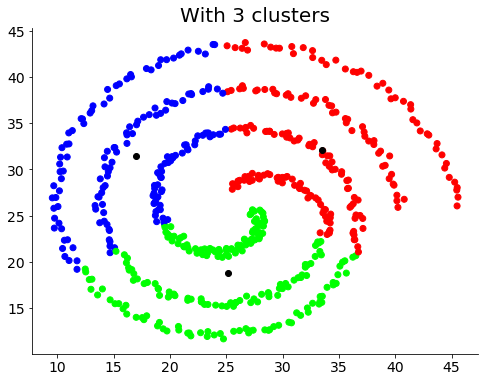

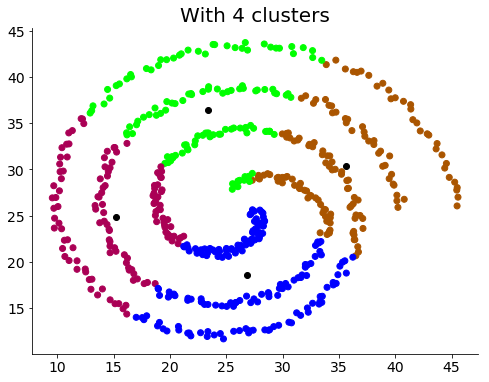

In [7]:
# Run algorithm for all data sources
for source in range(1,7):
    # Read the data
    X = pd.read_csv('../Data/cluster'+(str)(source)+'.csv').iloc[:, [1,2]].values
    
    # Visualize data
    clusters = [2] * X.shape[0]
    visualize_cluster_data(plt, X, clusters, 'Raw data')
    
    # Visualize the elbow chart
    visualize_elbow_chart(plt, X, range(1,11), filename='file' + (str)(source) + '_elbow_chart', random_state = random_state)
    
    # For different cluster values
    for c in range(2,5):
        # Fit kmeans
        kmeans = KMeans(n_clusters = c, random_state = random_state)
        kmeans.fit(X)
        
        # Visualize the resultant cluster
        visualize_cluster_data(plt, X, kmeans.labels_, 'With '+ (str)(c) +' clusters', kmeans.cluster_centers_, filename = 'file' + (str)(source) + '_' + (str)(c)+ 'clusters')
        